<a href="https://colab.research.google.com/github/vickypandey07/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction_Vikram_Pandey_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone and its selling price.**
---
###**Dataset Information**
* Number of instances: 2000
* Number of attributes: 21
---
###**Features information:**
###The dataset contains features like:

1. **Battery_power** - Total energy a battery can store in one time measured in mAh

2. **Blue** - Has bluetooth or not

3. **Clock_speed** - speed at which microprocessor executes instructions

4. **Dual_sim** - Has dual sim support or not

5. **Fc** - Front Camera mega pixels

6. **Four_g** - Has 4G or not

7. **Int_memory** - Internal Memory in Gigabytes

8. **M_dep** - Mobile Depth in cm

9. **Mobile_wt** - Weight of mobile phone

10. **N_cores** - Number of cores of processor

11. **Pc** - Primary Camera mega pixels

12. **Px_height** - Pixel Resolution Height

13. **Px_width** - Pixel Resolution Width

14. **Ram** - Random Access Memory in Mega Bytes

15. **Sc_h** - Screen Height of mobile in cm

16. **Sc_w** - Screen Width of mobile in cm

17. **Talk_time** - longest time that a single battery charge will last when you are on call

18. **Three_g** - Has 3G or not

19. **Touch_screen** - Has touch screen or not

20. **Wifi** - Has wifi or not
---
###**Target Variable :**
* **'Price_range'**: This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the price range of mobile phones.**

# **Let's Import the libraries**

In [186]:
# Importing libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To supress the warnings

import warnings
warnings.filterwarnings('ignore')

# **Loading Dataset**

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
# Loading dataset and creating dataframe

df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [189]:
# Let's use head to look for  first five rows

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [190]:
#let's use Tail for last five rows

df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [191]:
df.shape

(2000, 21)

* **Number of instances: 2000, Number of attributes: 21**



In [192]:
#let's check for number of columns available 

df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [193]:
# checking for info about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Two types of a data types are here  float and integers.**

In [194]:
#Statistical Description of all the Features

df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**The dataset contains:**
* **Her, Dichotomous type variables such as wifi, 3g, 4g, dual_sim and touch screen.** 
* **Nominal type variables such as n_cores and m_deep.**

# **Exploratory Data Analysis on Features**

## **Dependent variable -price_range**

In [195]:
# Let's check unique categories of dependent variable

df['price_range'].unique()

array([1, 2, 3, 0])

Text(0.5, 1.0, 'Count of price range')

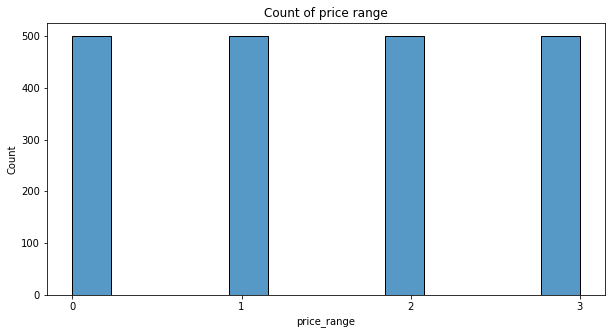

In [196]:
# This is Histplot to show the count of all categories

plt.figure(figsize=(10,5))
xtick=[0,1,2,3]
sns.histplot(data=df['price_range'])
plt.xticks(xtick)
plt.title('Count of price range')

**Here each price range has equal number of observations.**

## **n_cores**

In [197]:
# Checking unique categories

sorted(list(df['n_cores'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8]

In [198]:
# Value counts of each of categories.

df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

Text(0.5, 1.0, 'Count of each cores of processor')

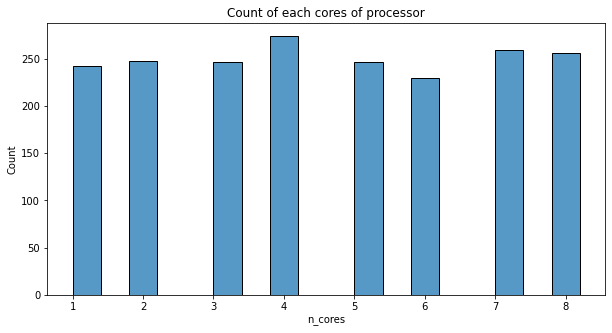

In [199]:
# Histplot to show count of each categories

plt.figure(figsize=(10,5))
sns.histplot(df['n_cores'],binwidth=0.4)
plt.title('Count of each cores of processor')

**There is almost equal number of observations for each cores with highest observation for 4 cores.**

## **blue**

In [200]:
# Let's check  unique categories first
 
df['blue'].unique()

array([0, 1])

Text(0.5, 1.0, 'Count of phones for blue')

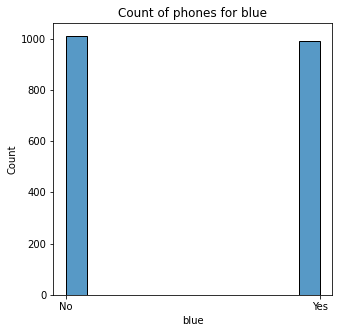

In [201]:
# Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['blue'])
plt.xticks(xtick, label)
plt.title('Count of phones for blue')

## **dual_sim**

In [202]:
#Let's check unique categories

df['dual_sim'].unique()

array([0, 1])

Text(0.5, 1.0, 'Count of phones for dual_sim')

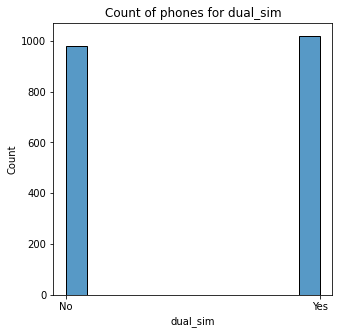

In [203]:
# let's use Histplot to show count of each categories

plt.figure(figsize=(5,5))
xtick=[0,1]
label = ['No', 'Yes']
sns.histplot(df['dual_sim'])
plt.xticks(xtick, label)
plt.title('Count of phones for dual_sim')

* **All these features have only two values i.e. '1' or '0'.**
* **Number of observation is almost equal for all these features.**

## **int_memory and mobile_wt**

Text(0.5, 1.0, 'Box plot for medium range variables')

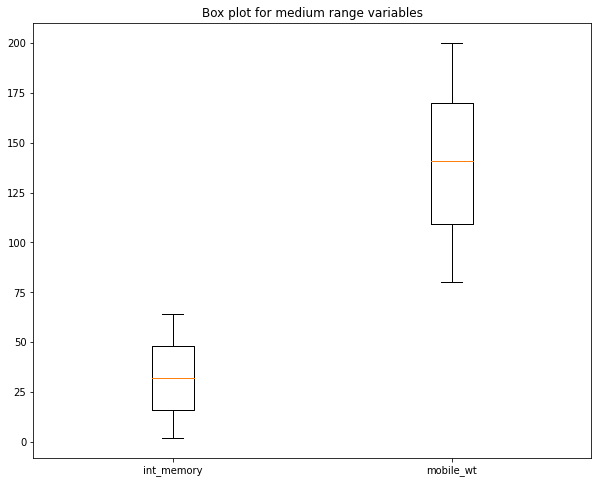

In [204]:
# visualizing stats of these variables using box plots

plt.figure(figsize=(10,8))
xtick=[1,2]
label=['int_memory','mobile_wt']
plt.boxplot(df[['int_memory','mobile_wt']].values)
plt.xticks(xtick,label)
plt.title('Box plot for medium range variables')

**Mean value for internal memory is around 32 and min and max values are 64 and 2.**

**Mean value for weight is around 141 and min and max values are 200 and 80.**

## **clock_speed, fc, pc, sc_h, sc_w, talk_time**

Text(0.5, 1.0, 'Box plot for low range variables')

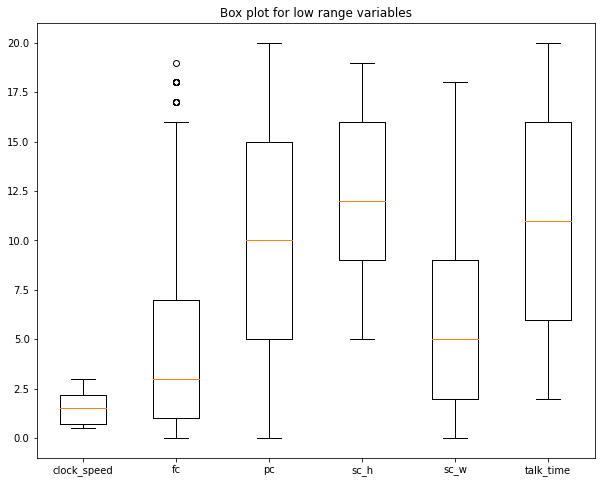

In [205]:
# visualizing stats of these variables using box plots

plt.figure(figsize=(10,8))
xtick=[1,2,3,4,5,6]
label=['clock_speed','fc','pc','sc_h','sc_w','talk_time']
plt.boxplot(df[['clock_speed','fc','pc','sc_h','sc_w','talk_time']].values)
plt.xticks(xtick,label)
plt.title('Box plot for low range variables')


**Mean value for clock speed is around 1.5 and min and max values are 3 and 0.5 respectively.**

**Mean value of front camera and primary camera mega pixel is around 3 and 10 and min and max values are 19, 0 for front and 20, 0 for primary.**

**Mean value of screen height and width is around 12 and 5 and min and max values are 19, 5 for height and 18, o for width.**

**Mean value of talktime is around 11 and min and max values are 20 and 2.**

## **Correlation matrix**

Text(0.5, 1.0, 'Heatmap')

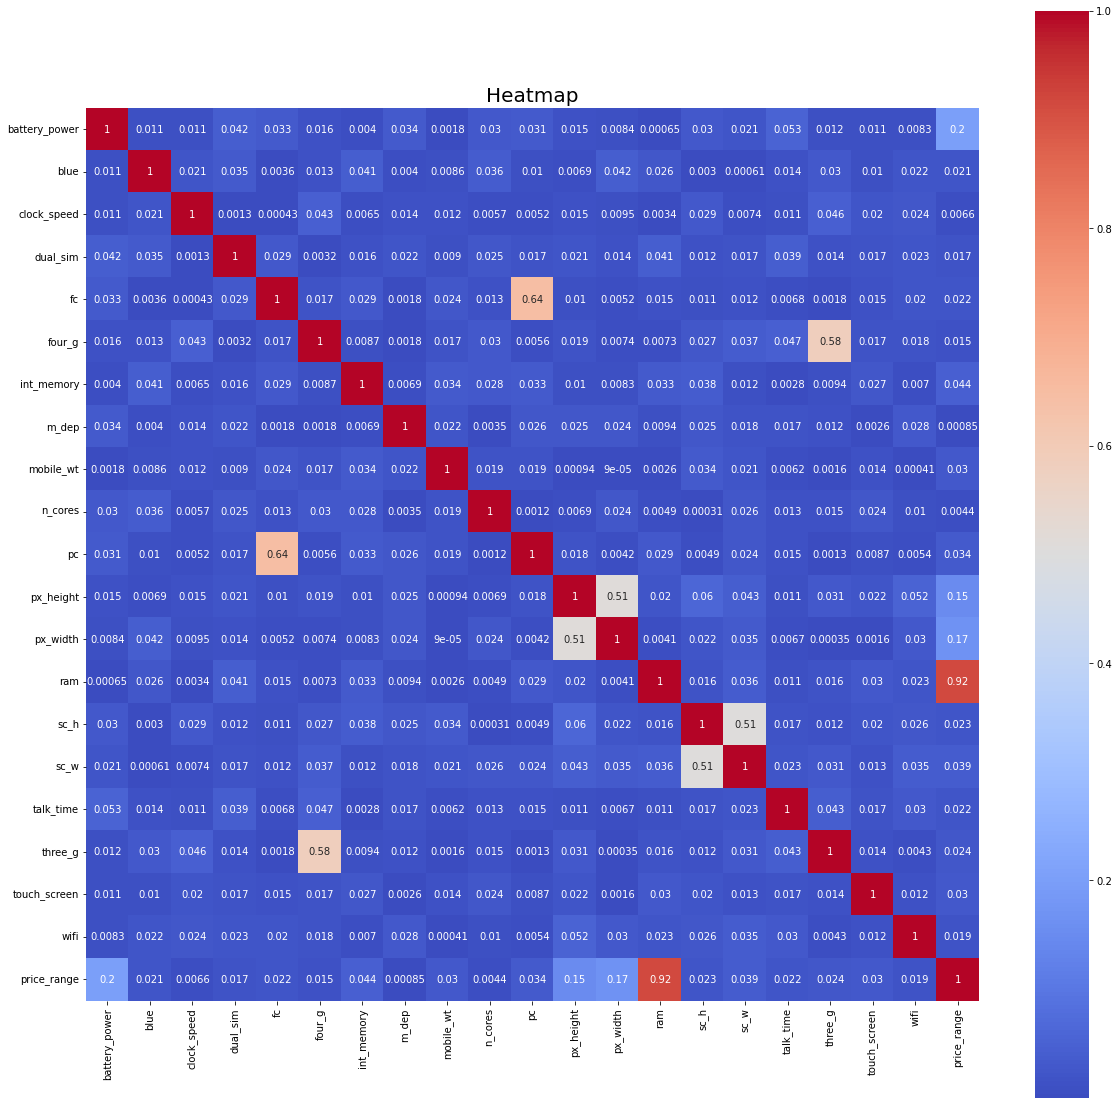

In [206]:
# Plotting correlation matrix

plt.figure(figsize=(20,20))
sns.heatmap(abs(df.corr()),annot=True, cmap='coolwarm',square=True)
plt.title('Heatmap',fontsize=20)

**Ram is highly correlated with price_range.**

**pc is correlated with fc.**

**three_g and four_g are moderately correlated.**

### **Now, let's try to find impact of independent variables on dependent variable(price_range).**

### **wifi V/S price_range**

Text(0, 0.5, 'No. of phones')

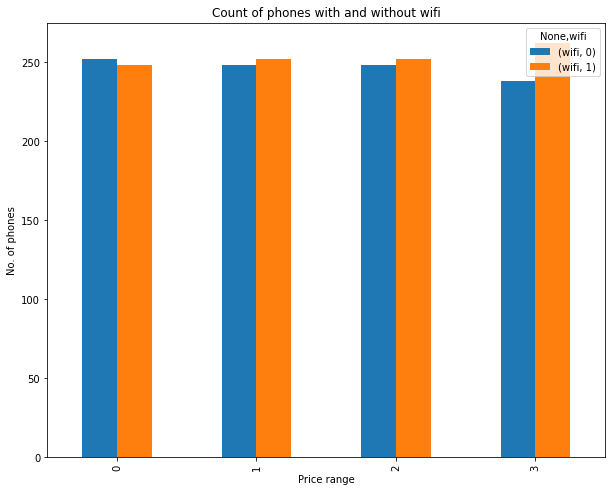

In [207]:
# Barplot showing price_range of phones with wifi or not.

plt.rcParams['figure.figsize']=(10,8)
df.groupby(['price_range']).agg({'wifi':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones with and without wifi')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

**All price ranges have almost equal no. of observations for both with or without wifi.**

### **Four_g V/S price_range**

Text(0, 0.5, 'No. of phones')

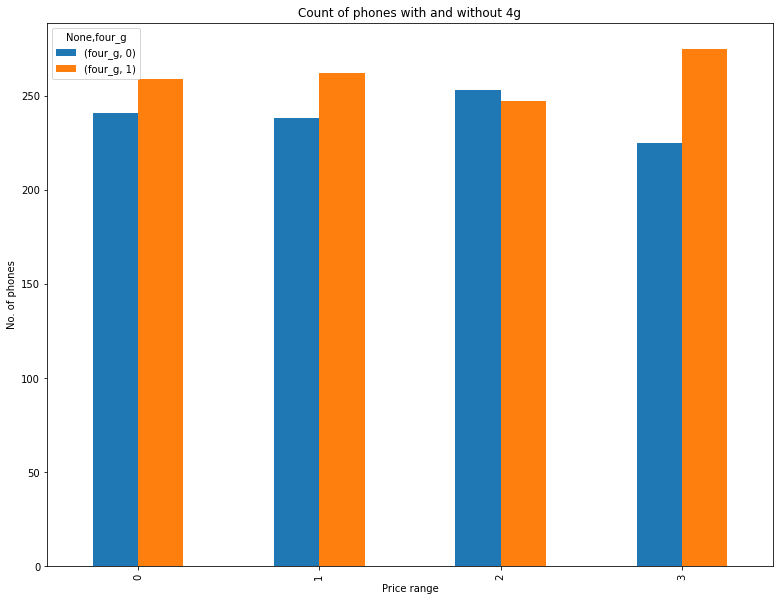

In [208]:
# Barplot showing price_range of phones with 4g or not.

plt.rcParams['figure.figsize']=(13,10)
df.groupby(['price_range']).agg({'four_g':'value_counts'}).unstack().plot.bar()
plt.title('Count of phones with and without 4g')
plt.xlabel('Price range')
plt.ylabel('No. of phones')

**All price ranges have almost equal no. of observations for both with or without 4g.**
**But for very high price range, 4g should be supported.**

### **N_cores and m_depth V/S price range**

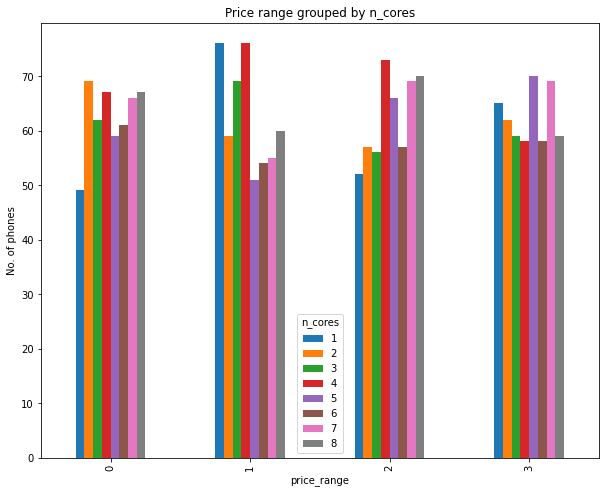

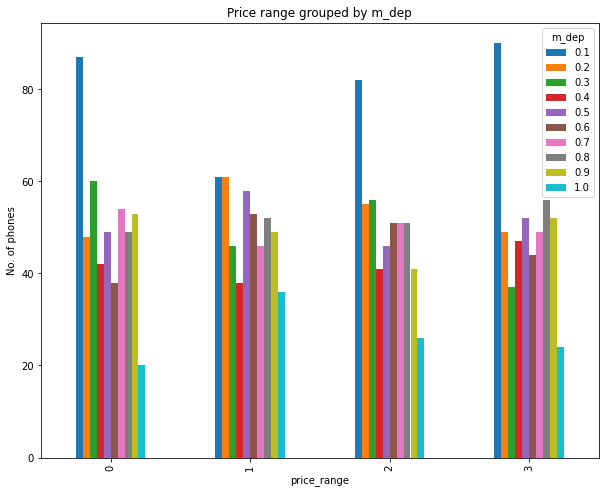

In [209]:
# Grouping price range with n_cores and m_dep and visualizing 

list1=['n_cores','m_dep']
for item in list1:
  plt.rcParams['figure.figsize']=(10,8)
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar()
  plt.title(f'Price range grouped by {item}')
  plt.ylabel('No. of phones')

### **mobile_wt v/s price_range**

Text(0.5, 1.0, 'mobile_wt vs price range')

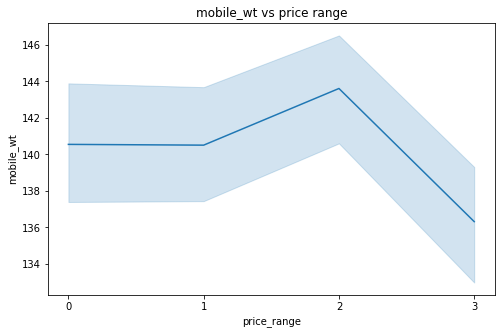

In [210]:
# Lineplot to show relation between mobile weight and price range.

plt.figure(figsize=(8,5))
xtick=[0,1,2,3]
sns.lineplot(x='price_range',y='mobile_wt',data=df)
plt.xticks(xtick)
plt.title('mobile_wt vs price range')

**There is drastic decrease in mobile weight for very high prices.**

### **Ram v/s price_range**

Text(0.5, 1.0, 'Ram vs price range')

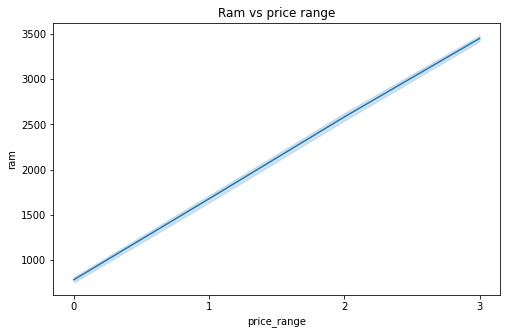

In [211]:
# Visualizing price range with ram using lineplot

plt.figure(figsize=(8,5))
xtick=[0,1,2,3]
plt.xticks(xtick)
sns.lineplot(x='price_range',y='ram',data=df)
plt.title('Ram vs price range')

**Ram is linearly positively correlated with price_range, means as ram increases price_range also increases.**

### **Battery_power, px_height, px_width, ram v/s price_range**

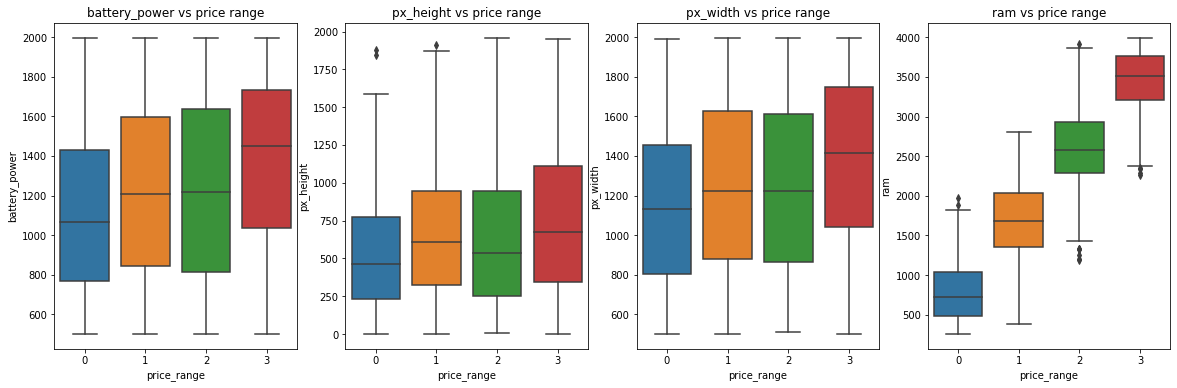

In [212]:
# Visualizing price range grouped by these variables using boxplot

list1=['battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,6))
for index,item in enumerate(list1):
  xtick=[0,1,2,3]
  plt.subplot(1,4,index+1)
  plt.xticks(xtick)
  sns.boxplot(x='price_range',y=item,data=df)
  plt.title(f'{item} vs price range')

* **Mean value of all these variables is increasing with increase in prices.**
* **Also, all these variables are positively correlated with target variable**

# **Data Cleaning**

### **Let's check for Nan values.**

In [213]:
# Checking for Null values

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

**In our dataset there is no null values. Nice!**

### **Let's check for outliers.**

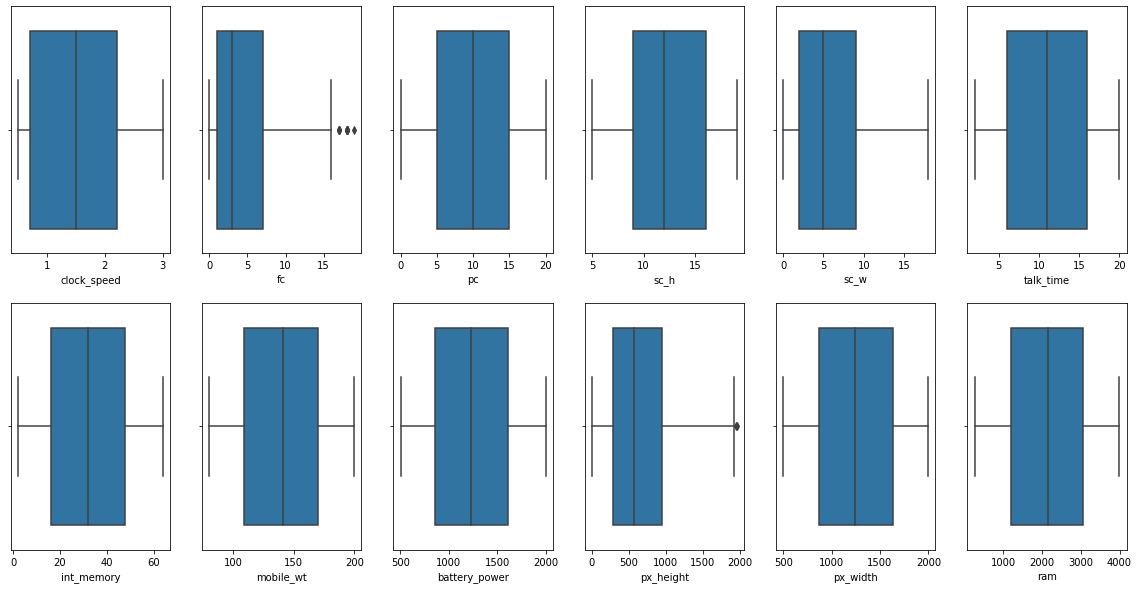

In [214]:
# Checking outliers for discrete and continous type variables using box plot

list1=['clock_speed','fc','pc','sc_h','sc_w','talk_time','int_memory','mobile_wt','battery_power','px_height','px_width','ram']
plt.figure(figsize=(20,10))
for index,item in enumerate(list1):
  plt.subplot(2,6,index+1)
  sns.boxplot(df[item])

**It seemss like there are no outliers except in fc but we can ignore them because they are close to the maximum value.**

## **Feature Engineering**

**Let's remove some unnecessary columns and add new columns.**

In [215]:
# First make copy of dataset before making changes

mobile_df=df.copy()

* **px_height and px_width were moderately correlated.**
* **Also, sc_h and sc_w were moderately correlated**

**Thus we can convert them into single columns.**

In [216]:
# Creating new column px_area from px_height and px_weight

mobile_df['px_area']=mobile_df['px_height']*mobile_df['px_width']

In [217]:
# Creating new column sc_area from sc_h and sc_w

mobile_df['sc_area']=mobile_df['sc_h']*mobile_df['sc_w']

**Now we can drop px_hieght, px_width, sc_h, sc_w columns from our dataframe.**

In [218]:
# Dropping columns

mobile_df.drop(columns=['px_height','px_width','sc_h','sc_w',],inplace=True)

## **Data Splitting and Data Scaling**

In [219]:
# importing libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [220]:
# selecting independent features

X=mobile_df.drop(columns='price_range')

In [221]:
# selecting dependent/target variable

y=mobile_df['price_range']

In [222]:
# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)  # random_state=12 to ensure same observations in each set everytime we run

In [223]:
# scaling the independent variables

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# **Models fitting**

**First, we fit the model with default hyperparameters and check the performance.**

**After that we will tune hyperparameters to enhance the performance.**

## **Random Forest Classifier**

In [224]:
# Importing library

from sklearn.ensemble import RandomForestClassifier

**With default hyperparameters**

In [225]:
# Creating instance of random forest and fitting data

rf=RandomForestClassifier(random_state=12)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [226]:
# predicting for both train and test

y_pred_train1=rf.predict(X_train)
y_pred_test1=rf.predict(X_test)

**Evaluation metrics**

In [227]:
# Importing libraries

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,classification_report,roc_auc_score

In [228]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train1))
print('The precision of training set = ',precision_score(y_train,y_pred_train1,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train1,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train1,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train1))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  1.0
The precision of training set =  [1. 1. 1. 1.]
The recall of training set =  [1. 1. 1. 1.]
The f1 score of training set =  [1. 1. 1. 1.]
The confusion matrix of training set = 
 [[398   0   0   0]
 [  0 395   0   0]
 [  0   0 405   0]
 [  0   0   0 402]]


In [229]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test1))
print('The precision of test set = ',precision_score(y_test,y_pred_test1,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test1,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test1,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test1))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.8825
The precision of test set =  [0.92307692 0.87       0.81632653 0.91836735]
The recall of test set =  [0.94117647 0.82857143 0.84210526 0.91836735]
The f1 score of test set =  [0.93203883 0.84878049 0.82901554 0.91836735]
The confusion matrix of test set = 
 [[96  6  0  0]
 [ 8 87 10  0]
 [ 0  7 80  8]
 [ 0  0  8 90]]


In [230]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       102
           1       0.87      0.83      0.85       105
           2       0.82      0.84      0.83        95
           3       0.92      0.92      0.92        98

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



* **Accuracy score for train set is 1.0 and acuuracy score for test set is 0.88. Our model overfitted training data.**

In [231]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train1),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=pd.DataFrame(dict1,index=[0])

In [232]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test1),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test1,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test1,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=pd.DataFrame(dict2,index=[0])

### **Now let's tune hyperparameter using BayesSearchCV.**

In [233]:
# installing Bayes Search

! pip install scikit-optimize
from skopt import BayesSearchCV

In [234]:
# creating a bayes model
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': (4,8),
                          'min_samples_leaf': (10,100),
                          'min_samples_split': (50,150),
                          'n_estimators': (80,200)
                        },
                       cv = 5, scoring='accuracy',random_state=12)

rf_bayes.fit(X_train,y_train)

BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
                                               oob_score=False, random_state=12,
                  

In [235]:
# checking the best estimator

rf_bayes.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [236]:
# checking the best parameters

rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 50),
             ('n_estimators', 200)])

In [237]:
# storing the best estimator in a variable

rf_optimal_model=rf_bayes.best_estimator_

In [238]:
# predicting on both train and test

y_pred_train2=rf_optimal_model.predict(X_train)
y_pred_test2=rf_optimal_model.predict(X_test)

In [239]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - Random forest:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train2))
print('The precision of training set = ',precision_score(y_train,y_pred_train2,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train2,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train2,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train2))

The evaluation metric values for training set - Random forest:
The accuracy of training set =  0.91
The precision of training set =  [0.92307692 0.86614173 0.88860759 0.95833333]
The recall of training set =  [0.96482412 0.83544304 0.86666667 0.97263682]
The f1 score of training set =  [0.94348894 0.85051546 0.8775     0.9654321 ]
The confusion matrix of training set = 
 [[384  14   0   0]
 [ 32 330  33   0]
 [  0  37 351  17]
 [  0   0  11 391]]


In [240]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - Random forest:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test2))
print('The precision of test set = ',precision_score(y_test,y_pred_test2,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test2,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test2,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test2))

The evaluation metric values for test set - Random forest:
The accuracy of test set =  0.8575
The precision of test set =  [0.91428571 0.83505155 0.76767677 0.90909091]
The recall of test set =  [0.94117647 0.77142857 0.8        0.91836735]
The f1 score of test set =  [0.92753623 0.8019802  0.78350515 0.91370558]
The confusion matrix of test set = 
 [[96  6  0  0]
 [ 9 81 15  0]
 [ 0 10 76  9]
 [ 0  0  8 90]]


In [241]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       102
           1       0.84      0.77      0.80       105
           2       0.77      0.80      0.78        95
           3       0.91      0.92      0.91        98

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



**Accuracy score for train set is 0.91 and acuuracy score for test set is 0.86.**

**Not bad. Better than default hyperparameters.**

In [242]:
# storing metric values in train df for later comparisons

dict1={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train2),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [243]:
# storing metric values in test df for later comparisons

dict2={'Model':'Random Forest - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test2),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test2,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test2,average=None),decimals=2))],
       'Comments':'Reduced overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

## **XGBoost Classifier**

In [244]:
# Importing library

from xgboost import XGBClassifier

**With default hyperparameters**

In [245]:
# Creating instance of XGBoost classifier

xgb_model=XGBClassifier(random_state=12,n_jobs=-1)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [246]:
# predicting for both training and test set

y_pred_train3=xgb_model.predict(X_train)
y_pred_test3=xgb_model.predict(X_test)

In [247]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train3))
print('The precision of training set = ',precision_score(y_train,y_pred_train3,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train3,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train3,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train3))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.973125
The precision of training set =  [0.98992443 0.955      0.95577396 0.99242424]
The recall of training set =  [0.98743719 0.96708861 0.96049383 0.97761194]
The f1 score of training set =  [0.98867925 0.96100629 0.95812808 0.98496241]
The confusion matrix of training set = 
 [[393   5   0   0]
 [  4 382   9   0]
 [  0  13 389   3]
 [  0   0   9 393]]


In [248]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test3))
print('The precision of test set = ',precision_score(y_test,y_pred_test3,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test3,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test3,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test3))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.915
The precision of test set =  [0.94117647 0.91       0.86868687 0.93939394]
The recall of test set =  [0.94117647 0.86666667 0.90526316 0.94897959]
The f1 score of test set =  [0.94117647 0.88780488 0.88659794 0.94416244]
The confusion matrix of test set = 
 [[96  6  0  0]
 [ 6 91  8  0]
 [ 0  3 86  6]
 [ 0  0  5 93]]


**Before hyperparameters tuning:**

* **Accuracy score for train set is 0.97 and acuuracy score for test set is 0.91. Let's try to tune hyperparameters to decrease overfitting.**

**Let's store these scores to compare with tuned model.**

In [249]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train3),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train3,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train3,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train3,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
training_df=training_df.append(dict1,ignore_index=True)

In [250]:
# storing metric values in train df for later comparisons

dict2={'Model':'XGBoost - Before hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test3),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test3,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test3,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test3,average=None),decimals=2))],
       'Comments':'Possible overfitting'}
test_df=test_df.append(dict2,ignore_index=True)

### **Now let's tune hyperparameter using BayesSearchCV.**

In [251]:
# creating a bayes model

xgb_bayes = BayesSearchCV(estimator=xgb_model,
                       search_spaces = {
                          'max_depth': (4,10),
                          'n_estimators': (10,15),
                          'min_child_weight': (2,10),
                          'learning_rate':(0.05,0.15),
                          'gamma':(1,4)
                        },
                       cv = 5, scoring='accuracy',random_state=12)

xgb_bayes.fit(X_train,y_train)

BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=1, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=3, min_child_weight=1,
                                      missing=None, n_estimators=100, n_jobs=-1,
                                      nthread=None, objective='multi:softprob',
                                      random_state=12, reg_alpha=0,
                                      reg_lambda=1, sc...
                                      seed=None, silent=None, subsample=1,
                                      verbosity=1),
              fit_params=None, iid=True, n_iter=50, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=12,
              refit=True, re

In [252]:
# checking th ebest estimator

xgb_bayes.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.14605209370488115, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=15, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [253]:
# checking the best parameters

xgb_bayes.best_params_

OrderedDict([('gamma', 1),
             ('learning_rate', 0.14605209370488115),
             ('max_depth', 6),
             ('min_child_weight', 2),
             ('n_estimators', 15)])

In [254]:
# storing the best estimator in a variable

xgb_optimal_model1=xgb_bayes.best_estimator_

In [255]:
# predicting on both train and test

y_pred_train4=xgb_optimal_model1.predict(X_train)
y_pred_test4=xgb_optimal_model1.predict(X_test)

In [256]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train4))
print('The precision of training set = ',precision_score(y_train,y_pred_train4,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train4,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train4,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train4))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.969375
The precision of training set =  [0.97744361 0.95       0.96277916 0.98743719]
The recall of training set =  [0.9798995  0.96202532 0.95802469 0.97761194]
The f1 score of training set =  [0.97867001 0.95597484 0.96039604 0.9825    ]
The confusion matrix of training set = 
 [[390   8   0   0]
 [  9 380   6   0]
 [  0  12 388   5]
 [  0   0   9 393]]


In [257]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test4))
print('The precision of test set = ',precision_score(y_test,y_pred_test4,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test4,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test4,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test4))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.88
The precision of test set =  [0.94897959 0.88888889 0.78504673 0.90625   ]
The recall of test set =  [0.91176471 0.83809524 0.88421053 0.8877551 ]
The f1 score of test set =  [0.93       0.8627451  0.83168317 0.89690722]
The confusion matrix of test set = 
 [[93  9  0  0]
 [ 5 88 12  0]
 [ 0  2 84  9]
 [ 0  0 11 87]]


In [258]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test4))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       102
           1       0.89      0.84      0.86       105
           2       0.79      0.88      0.83        95
           3       0.91      0.89      0.90        98

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



* **Accuracy score for train set is 0.97 and acuuracy score for test set is 0.88. Not good. Let's try GridSearch.**

### **Now let's tune hyerparameters using GridSearchCV**

In [ ]:
# Importing Library

from sklearn.model_selection import GridSearchCV

In [177]:
# Setting the parameters to tune

# Number of trees
n_estimators = list(np.arange(5,12,2,dtype='int64'))

# Maximum depth of trees
max_depth = list(np.arange(10,15,1,dtype='int64'))

# learning rate
learning_rate=list(np.arange(0.05,0.1,0.01))

# min childs weight
min_child_weight=list(np.linspace(10,15,num=1,dtype='int64'))

# gamma
gamma=list(np.linspace(0,2,num=20,dtype='int64'))

# subsamples
subsample=[0.3,0.5,0.8] 

# HYperparameter Grid
param_dict1 = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
               'min_child_weight':min_child_weight,
               'gamma':gamma,
               'subsample':subsample,
               'learning_rate':learning_rate}

In [179]:
# Grid search

xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_dict1,cv = 3,scoring='accuracy',n_jobs=-1, verbose=2)
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 6000 candidates, totalling 18000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 702 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 1268 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 1998 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3942 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5156 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 6534 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 8072 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 9774 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 11636 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 13662 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 15848 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 18000 out of 1

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=12, reg_alpha=0, reg_lambda=1,
                                     scale_p...
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                                   1, 1, 1, 1, 2],
                         'learning_rate': [0.05, 0.060000000000000005, 0.07,
                                           0.08000000000000002,
   

In [180]:
# Checking the best estimator

xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.09000000000000001, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=None, n_estimators=11, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=12,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [181]:
# Checking the best parameters

xgb_grid.best_params_

{'gamma': 0,
 'learning_rate': 0.09000000000000001,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 11,
 'subsample': 0.8}

In [259]:
# storing the best estimator in a variable

xgb_optimal_model2=xgb_grid.best_estimator_

In [260]:
# predicting on both train and test

y_pred_train5=xgb_optimal_model2.predict(X_train)
y_pred_test5=xgb_optimal_model2.predict(X_test)

In [261]:
# evalutaing the model using metrics
# finding each of the metrics for training set

print('The evaluation metric values for training set - XGBoost:')
print('The accuracy of training set = ',accuracy_score(y_train,y_pred_train5))
print('The precision of training set = ',precision_score(y_train,y_pred_train5,average=None))
print('The recall of training set = ',recall_score(y_train,y_pred_train5,average=None))
print('The f1 score of training set = ',f1_score(y_train,y_pred_train5,average=None))
print('The confusion matrix of training set = \n',confusion_matrix(y_train,y_pred_train5))

The evaluation metric values for training set - XGBoost:
The accuracy of training set =  0.916875
The precision of training set =  [0.94540943 0.88804071 0.88395062 0.94987469]
The recall of training set =  [0.95728643 0.8835443  0.88395062 0.94278607]
The f1 score of training set =  [0.95131086 0.8857868  0.88395062 0.9463171 ]
The confusion matrix of training set = 
 [[381  17   0   0]
 [ 22 349  24   0]
 [  0  27 358  20]
 [  0   0  23 379]]


In [262]:
# finding each of the metrics for test set

print('The evaluation metric values for test set - XGBoost:')
print('The accuracy of test set = ',accuracy_score(y_test,y_pred_test5))
print('The precision of test set = ',precision_score(y_test,y_pred_test5,average=None))
print('The recall of test set = ',recall_score(y_test,y_pred_test5,average=None))
print('The f1 score of test set = ',f1_score(y_test,y_pred_test5,average=None))
print('The confusion matrix of test set = \n',confusion_matrix(y_test,y_pred_test5))

The evaluation metric values for test set - XGBoost:
The accuracy of test set =  0.87
The precision of test set =  [0.91089109 0.84848485 0.80392157 0.91836735]
The recall of test set =  [0.90196078 0.8        0.86315789 0.91836735]
The f1 score of test set =  [0.90640394 0.82352941 0.83248731 0.91836735]
The confusion matrix of test set = 
 [[92 10  0  0]
 [ 9 84 12  0]
 [ 0  5 82  8]
 [ 0  0  8 90]]


In [263]:
# checking classification report for test set

print(classification_report(y_test,y_pred_test5))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       102
           1       0.85      0.80      0.82       105
           2       0.80      0.86      0.83        95
           3       0.92      0.92      0.92        98

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



**After hyperparameter tuning:**

* **Accuracy score for train set is 0.91 and acuuracy score for test set is 0.87.**

### **GridSearch gives better results as compared to BayesSearch.**

**Let's store these scores.**

In [264]:
# storing metric values in train df for later comparisons

dict1={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_train,y_pred_train5),2),
       'Precision':[list(np.around(precision_score(y_train,y_pred_train5,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_train,y_pred_train5,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_train,y_pred_train5,average=None),decimals=2))],
       'Comments':'Best of all model'}
training_df=training_df.append(dict1,ignore_index=True)

In [265]:
# storing metric values in train df for later comparisons

dict2={'Model':'XGBoost - After hyperparameter tuning',
       'Accuracy':round(accuracy_score(y_test,y_pred_test5),2),
       'Precision':[list(np.around(precision_score(y_test,y_pred_test5,average=None),decimals=2))],
       'Recall':[list(np.around(recall_score(y_test,y_pred_test5,average=None),decimals=2))],
       'F1_score':[list(np.around(f1_score(y_test,y_pred_test5,average=None),decimals=2))],
       'Comments':'Best of all model'}
test_df=test_df.append(dict2,ignore_index=True)

### **Let's see the results of both the models.**

In [269]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model  ...              Comments
Training set 0  Random Forest - Before hyperparameter tuning  ...  Possible overfitting
             1   Random Forest - After hyperparameter tuning  ...   Reduced overfitting
             2        XGBoost - Before hyperparameter tuning  ...  Possible overfitting
             3         XGBoost - After hyperparameter tuning  ...     Best of all model
Test set     0  Random Forest - Before hyperparameter tuning  ...  Possible overfitting
             1   Random Forest - After hyperparameter tuning  ...   Reduced overfitting
             2        XGBoost - Before hyperparameter tuning  ...  Possible overfitting
             3         XGBoost - After hyperparameter tuning  ...     Best of all model

[8 rows x 6 columns]

### **After applying Random Forest and XGBoost Classifier, we can conclude that our XGBoost performed very well.**

# **Model Explainability**

**Let's use SHAP technique to explain the model.**

In [266]:
# importing shap
!pip install shap
import shap
shap.initjs()

     |████████████████████████████████| 356 kB 35.4 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491640 sha256=bb7153331ba0841b55ba7d9eb8f942847551c3c701d19cbe562c3d4a609c8a75
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [267]:
# creating a shap instance for training set
l=X.columns.to_list()
X_train_val=pd.DataFrame(X_train,columns=l)
explainer_train = shap.TreeExplainer(xgb_optimal_model2)
shap_values_train = explainer_train.shap_values(X_train_val)

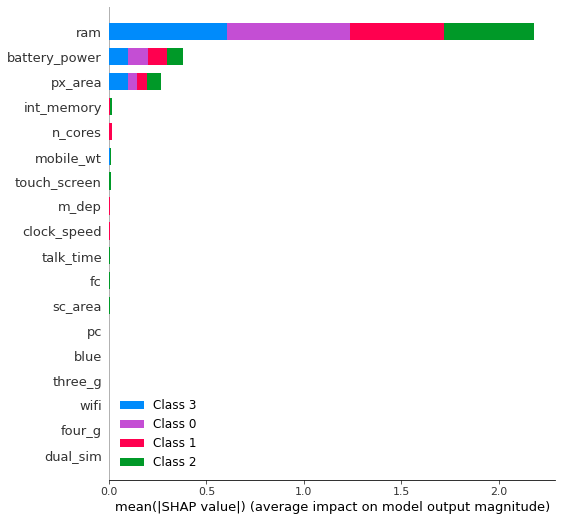

In [268]:
# Let's visualize

shap.summary_plot(shap_values_train,X_train_val,plot_type='bar')

In [270]:
# creating a shap instance for test set

X_test_val=pd.DataFrame(X_test,columns=l)
explainer_train = shap.TreeExplainer(xgb_optimal_model2)
shap_values_test = explainer_train.shap_values(X_test_val)

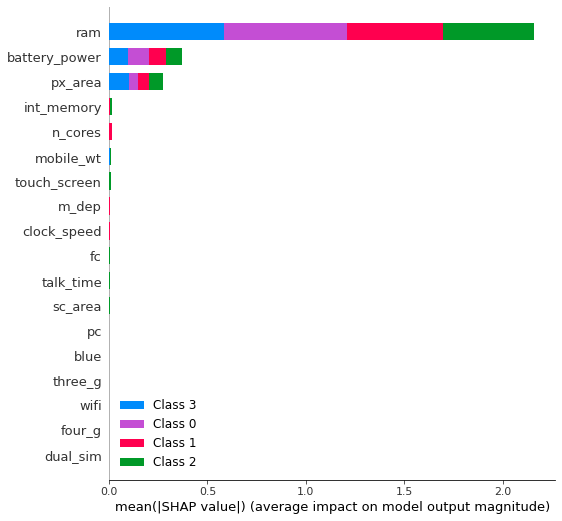

In [271]:
# Let's visualize

shap.summary_plot(shap_values_test,X_test_val,plot_type='bar')

**From above summary plot, it is clear that:**

* **Ram is most important feature in determining the predictions.**

* **Along with Ram; battery_power, px_area, int_memory also played major role in determining predictions.**

**So, these are the important features for our prediction.**

# **Conclusion**

### Out of Random Forest and XGBoost, the best performance was given by XGBoost Classifier.

### GridSearch gives better results as compared to BayesSearch. BayesSearch overfitted the data.

### Among all the features, ram, battery_power, px_area, int_memory were the important features to predict price range.

### Although in our case XGBoost model performed very well with default hyperparameters but tuning hyperparameters with RandomSearch can solve this issue.

### Also Random Forest got overfitted with default hyperparameters.

### Performance can be improved even further by applying fine tunings and gathering more amount of observations so that the models can identify more patterns and become less prone to overfitting.


### That's all!